自回归 的周期和阶的偏相关系数选择

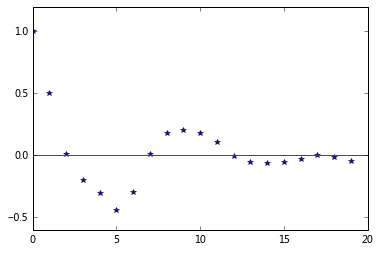

In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
n=1000
error=np.random.normal(size=n)
#plt.plot(data)
# 计算k阶自相关系数的函数

def autocoef(data,k):
    meanw=np.mean(data)
    n=len(data)    
    return np.nansum((data[:(n-k)]-meanw)*(data[k:]-meanw))/np.nansum((data-meanw)**2)
#下面这个函数生成随机数
from statsmodels.tsa.arima_process import arma_generate_sample
  
phi=[1,-0.6,0.4,0,0,0.3] 

data=arma_generate_sample(ar=phi,ma=[1],nsample=1000)
ac=[autocoef(data,i) for i in range(20)]
plt.plot(ac,"b*",[0,20],[0,0],"r-")
 


In [64]:
phi=[1,-0.6,0.4,0,0,0.3] 
phi.reverse()
roots=np.roots(phi)
phi.reverse()
print(roots)
print(np.abs(roots))
x=roots[1]
np.angle(roots)

[-1.57900783+0.j         -0.11770012+1.26161316j -0.11770012-1.26161316j
  0.90720404+0.70131135j  0.90720404-0.70131135j]
[ 1.57900783  1.26709158  1.26709158  1.14667205  1.14667205]


array([ 3.14159265,  1.66382042, -1.66382042,  0.65808876, -0.65808876])

In [65]:

2*np.pi/0.658

9.548913840698459

In [19]:
from scipy.linalg import toeplitz

def mypacf(ac,k):    
    r=ac[:k]
    R = toeplitz(r[:-1])
    rho = np.linalg.solve(R, r[1:])
    return(rho)


In [34]:
data=arma_generate_sample(ar=phi,ma=[1],nsample=10000)
ac=[autocoef(data,i) for i in range(20)]

#95%的阀值为：
print("阈值:",1.96/np.sqrt(10000))
print(mypacf(ac,3))
print(mypacf(ac,4))
print(mypacf(ac,5))
print(mypacf(ac,6))
print(mypacf(ac,7))

from statsmodels.tsa.stattools import pacf
pacf(data,6,method='ols')

阈值: 0.0196
[ 0.6738521  -0.36549317]
[ 0.66993456 -0.35827049 -0.01071849]
[ 0.66771107 -0.43259154  0.12825538 -0.20744396]
[ 0.60505294 -0.3938522  -0.00240824 -0.00576283 -0.30204849]
[ 0.60316446 -0.39388823 -0.0024233  -0.00822529 -0.29826557 -0.00625222]


array([ 1.        ,  0.49357456, -0.36564688, -0.01077499, -0.20768607,
       -0.30192111, -0.00639393])